In [2]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.linalg
np.random.seed(42)

# Direct Methods for the solution of Linear Systems

In [3]:
# Set the dimension
n = 10

# Create a random matrix n x n
A = np.random.randn(n,n)

# Create the x vector, made of ones, of dimension n
x_true = np.ones(n)

# Find the right hand side of the system by matrix multiplication
b = A @ x_true

In [4]:
# Compute condition number in 2-norm
cond_num_2 = np.linalg.cond(A, 2)

# Compute the upper bound on the error for the solution
eps_machine = 2**-52

rel_error_A = eps_machine / np.linalg.norm(A)
rel_error_b = eps_machine / np.linalg.norm(b)

max_rel_error_x = cond_num_2 * (rel_error_A + rel_error_b)
max_abs_error_x = max_rel_error_x *  np.linalg.norm(x_true)

print("The condition number in 2-norm of the matrix A is {:.2f}, which translates into an upper bound on the relative error in the solution of {:.2e}, or in our case an absolute error of {:.2e}".format(
    cond_num_2,
    max_rel_error_x,
    max_abs_error_x
))

print("The usual number of digits lost because of the magnitude of the condition number is ~log10(k), in this case ~{:.0f} digit(s)".format(np.log10(cond_num_2)))

The condition number in 2-norm of the matrix A is 22.97, which translates into an upper bound on the relative error in the solution of 1.04e-15, or in our case an absolute error of 3.30e-15
The usual number of digits lost because of the magnitude of the condition number is ~log10(k), in this case ~1 digit(s)


In [5]:
cond_num_inf = np.linalg.cond(A, np.inf)
print("The condition number in ∞-norm instead is {:.2f}".format(cond_num_inf))

The condition number in ∞-norm instead is 52.71


In [6]:
# Solve the system
x_sol = np.linalg.solve(A,b)

# Compute the relative error
rel_error_x = np.linalg.norm(x_sol-x_true) / np.linalg.norm(x_true)

print("The relative error on x is {:.2e}, that is {:.2f}% of the upper bound".format(
    rel_error_x,
    rel_error_x/max_rel_error_x*100
))

The relative error on x is 3.58e-16, that is 34.27% of the upper bound


In [7]:
from numpy.matrixlib.defmatrix import matrix
def get_errors_and_c_nums(n, matrix_type):
    '''
    Function that takes as input the dimensionality of the problem and the matrix type, and outputs the relative error on the solution and the condition numbers in 2-norm and ∞-norm

    Inputs:
        - n: dimensionality of the problem
        - matrix_type: ["rand", "vander", "hilbert"]

    Outputs:
        - rel_error_x: relative error between the x_true and x_sol
        - cond_num_2: condition number in 2-norm
        - cond_num_inf: condition number in ∞-norm
    '''

    # Create the matrix depending on the type
    if matrix_type == "rand":
        # Create random matrix
        A = np.random.rand(n,n)
    elif matrix_type == "vander":
        # Create vander matrix based on the vector [1,...,n]
        A = np.vander(np.arange(1,n+1))
    elif matrix_type == "hilbert":
        # Create hilbert matrix
        A = scipy.linalg.hilbert(n)
    else:
        raise NotImplementedError("The matrix_type '{}' is not implemented".format(matrix_type))

    # Create the x vector, made of ones, of dimension n
    x_true = np.ones(n)

    # Find the right hand side of the system by matrix multiplication
    b = A @ x_true

    # Solve the system
    x_sol = np.linalg.solve(A,b)

    # Compute the relative error
    rel_error_x = np.linalg.norm(x_sol-x_true) / np.linalg.norm(x_true)

    # Compute condition number in 2-norm
    cond_num_2 = np.linalg.cond(A, 2)

    # Compute condition number in ∞-norm
    cond_num_inf = np.linalg.cond(A, np.inf)

    return rel_error_x, cond_num_2, cond_num_inf


def plot_results(dimensions, matrix_type, log_scale=False):

    # Get the results
    results = [get_errors_and_c_nums(n, matrix_type) for n in dimensions]

    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    plt.plot(dimensions, [x[0] for x in results])
    plt.title("Relative error")
    plt.xlabel("n")
    plt.ylabel("Relative error")
    if log_scale: plt.yscale("log")

    plt.subplot(1, 2, 2)
    plt.plot(dimensions, [x[1] for x in results], dimensions, [x[2] for x in results])
    plt.title("Condition numbers")
    plt.xlabel("n")
    plt.ylabel("Condition number")
    plt.legend(["2-norm", "∞-norm"])
    if log_scale: plt.yscale("log")

    plt.show()



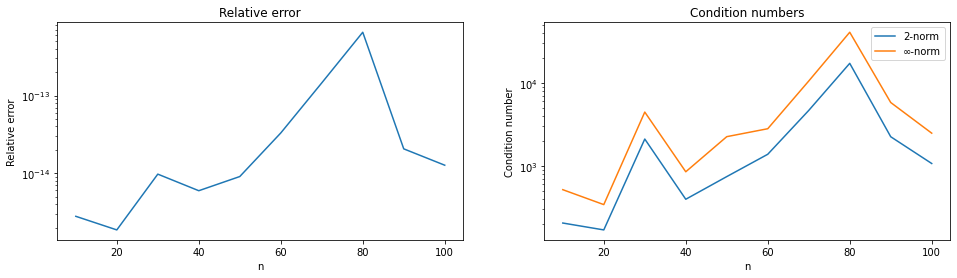

In [8]:
plot_results(np.arange(10, 101, 10), "rand", log_scale=True)

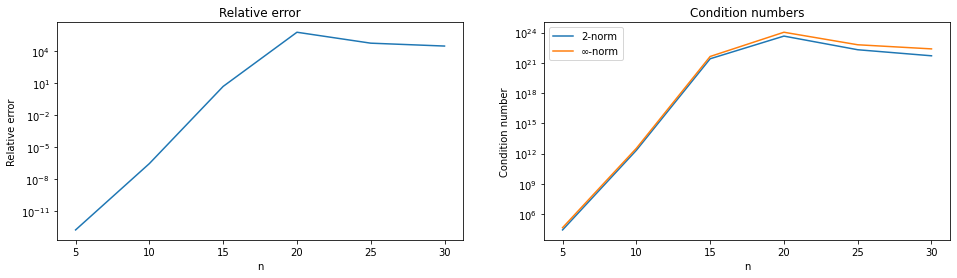

In [9]:
plot_results(np.arange(5,31,5), "vander", log_scale=True)

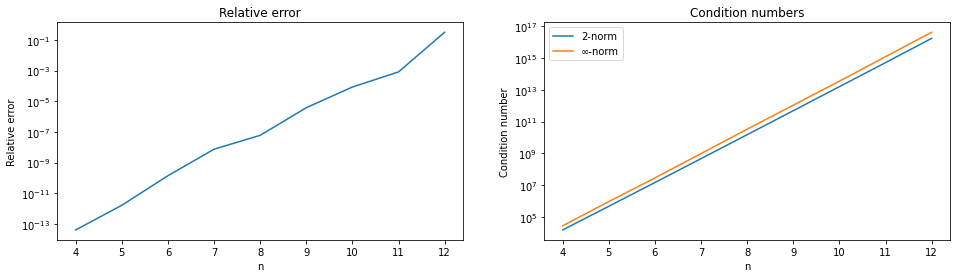

In [10]:
plot_results(np.arange(4,13), "hilbert", log_scale=True)

# Floating Point Arithmetic

In [11]:
# Start from a point above 1
x1 = 2

# Find the half point between x1 and 1
x2 = (x1+1)/2

# Keep count of the iterations
c = 0

# If the division brings you on 1 (x2 = 1), that means that x1 is the nearest value after 1
while x2 != 1:
    c += 1
    x1 = x2
    x2 = (x1+1)/2

    # Control statement to avoid infinite loops
    if c >= 1e5:
        break

print("# of iterations: {}".format(c))

# The difference between x1 and 1 will be the machine epsilon
print("Machine epsilon: {:.10e}".format(x1-1))
print("2^-52: {:.10e}".format(2**-52))


# of iterations: 52
Machine epsilon: 2.2204460493e-16
2^-52: 2.2204460493e-16


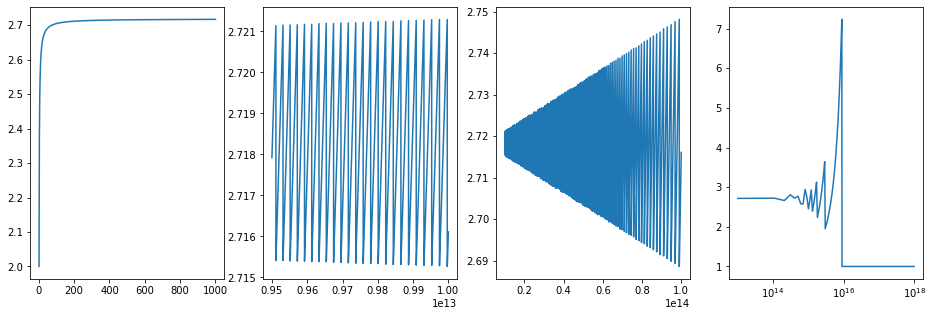

In [42]:
def get_a_n(n):
    return (1+1/n)**n

plt.figure(figsize=(16,5))

plt.subplot(1, 4, 1)
x = [round(n,0) for n in np.linspace(1,1e3,10000)]
plt.plot(x, [get_a_n(n) for n in x])

plt.subplot(1, 4, 2)
x = [round(n,0) for n in np.linspace(9.5e12,1e13,10000)]
plt.plot(x, [get_a_n(n) for n in x])

plt.subplot(1, 4, 3)
x = [round(n,0) for n in np.linspace(1e13,1e14
                                     ,10000)]
plt.plot(x, [get_a_n(n) for n in x])

plt.subplot(1, 4, 4)
x = [round(n,0) for n in np.linspace(1e13,1e18,10000)]
plt.plot(x, [get_a_n(n) for n in x])
plt.xscale("log")
plt.show()

For small valuesthe series converges to the euler number

For values over 1e16 it flatlines to 1, meaning that 1+1/n = 1, and that makes sense because 1/n will be SMALLER than machine epsilon, so a normalized float64 cannot register the change

For values in between instead the series loses convergence, because there is a small but noticeable difference between the REAL value of (1+1/n) and the approximated one. This however is multiplied by itself ~1e15 times, so the difference is amplified resulting in the graph above.

Most probably, for many numbers (1+1/n) results in the same approximation, and in fact all of the spikes (the last one is very noticeable) have an exponential trend, meaning that it is the same number only exponentiated with a bigger exponent. When the spike ends, 1+1/n goes to the next smallest number and another spike forms. The more time 1+1/n stays in the same bin, the higher the spike goes